# Multiple Linear Regression for House Price Prediction in Vancouver
#### Instructor: Martha Essak


### Names of students:
Kai Li (28707610)  
Fanting Qi (93217750) 

<div class="alert alert-block alert-warning">

# Table of Contents



[Project description](#Description)  
[Introduction](#Introduction)  
[Exploratory Data Analysis](#EDA)  
[Model fit to training data, checking assumptions](#Model_fit)  
[Hypothesis tests](#Hyp_tests)  
[Using the model for prediction](#Prediction)  
[Comparing to other candidate models](#Compare) 
[Discussion](#Discussion)


[Visualizing appropriate transformations](#Transformations)  
[Other candidate models](#Other_models)

---

<div class="alert alert-block alert-warning">
<a id="Description"></a>
    
# Project description


A multiple linear regression model will predict house sale prices (in $CAD) in Vancouver using these potential quantitative variables:  
- Days on market (days)
- Total floor area (square feet)
- Age (years); this is calculated from Year Built so you do not need to use Year Built
- Lot Size (square feet)

The data was collected from detached homes with sale prices of at most \\$3 million in 2019 and early 2020, prior to any impacts of the pandemic on the real estate market in Vancouver. Because all houses with prices over \\$3 million are excluded, the data may appear truncated.   

### Methods  
  
To develop the model, the dataset will be split into training and validation sets. The training set will be used for model development, and variables will be transformed. Exploratory data analysis will visualize variable relationships and transformations.

In the main part of the project, the results of your best model (referred to as the final model) will be presented. The final model selection will consider:
- checking assumptions are met
- assessing goodness of fit to the training set
- considering the variables and complexity of the model
- assessing how well the model predicts new data (using the validation set as new data)

At the end of the project, other considered candidate models will be explored. Strengths and limitations of the final model will be discussed, along with recommendations to address limitations.

---

<div class="alert alert-block alert-warning">
<a id="Introduction"></a>
    
# Introduction 

This project aims to develop a multiple linear regression model to predict the sale price of houses (CAD) in Vancouver and validate the model’s prediction accuracy. The data is collected from detached homes with sale prices of at most $3 million in 2019 and early 2020 before the pandemic. This helps to exclude the impact of “Black Swan" incidents such as the epidemic on the real estate market in Vancouver, which makes the housing price prediction model more universal. 

The sale price of houses is an important indicator reflecting the performance of the economy. Both real estate developers and buyers pay close attention to the fluctuations in housing prices. It is of great significance to build an effective housing price prediction model for the market. For this purpose, we first try to find the association between the response variable and each of the four different explanatory variables to analyze the factors affecting the housing price. Secondly, we input the explanatory variables covering different properties of housing into the trained model to obtain the predicted values of housing prices, followed by validation of the trained model. Comparison with other candidate models and discussions of the strengths and limitations of this model are conducted in the end. 

The primary advantage of using a model is that it can improve the speed and accuracy of price predictions. We can analyze multiple variables at once, which provides complete and clear insights at relatively low costs. Moreover, a regression model also can demonstrate how the value of the response variable changes when any one of the explanatory variables is varied, while other explanatory variables are held constant. Another benefit of using regression models is that it indicates significant relationships between explanatory variables and a response variable. The strength of the impact of multiple explanatory variables on a response variable is shown and the evolution of house prices over a period of time can also be seen intuitively (Panchotia, 2020)

Reference:
Panchotia, R. (2020, August 4). *Predictive modelling using linear regression*. Medium. Retrieved September 25, 2022, from https://medium.com/swlh/predictive-modelling-using-linear-regression-e0e399dc4745 

In [1]:
# Import the data:
mydata <- read.csv(file="House sale data Vancouver.csv", header=TRUE)
mydata

Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,3178 GRAVELEY STREET,5/8/2020,1500000,18,2447,1946,74,5674.00
2,1438 E 28TH AVENUE,1/22/2020,1300000,7,2146,1982,38,3631.98
3,2831 W 49TH AVENUE,6/18/2019,2650000,1,3108,1929,90,9111.00
4,2645 TRIUMPH STREET,6/18/2019,1385000,28,2602,1922,97,4022.70
5,741-743 E 10TH AVENUE,11/28/2019,1590000,17,1843,1970,49,4026.00
6,86 W 21ST AVENUE,3/3/2020,2565000,7,2439,1989,31,4026.00
7,2418 E 54TH AVENUE,8/12/2019,1303000,9,2100,1979,40,3298.48
8,1787 E 57TH AVENUE,6/13/2019,1150000,10,1900,1950,69,6574.82
9,2926 TRIMBLE STREET,8/16/2019,2500000,10,2133,2005,14,3360.00


---
*The dataset includes the following variables:*
- Number: To ensure consistent order, sort by Number if the observations are disordered.
- Address: House address.
- List.Date: Listing date of the house.
- Price: Final sale price (in $CAD), potentially different from the original asking price.
- Days.on.market: Number of days the house was on the market before selling.
- Total.floor.area: Total square footage of finished living space, including all floors.
- Year.Built: Year of house construction.
- Age: Calculated as the house's age at the time of sale.
- Lot.size: Lot size in square feet, encompassing the house's footprint and any yard or garden space.

---

In [2]:
# Create a training set and a validation set using the following code
# This will divide the dataset into ~80% training set (1042 observations)
# and ~ 20% validation set (260 observations)


mydata.train <- mydata[1:1042,]
mydata.valid <- mydata[1043:nrow(mydata),]

---
<div class="alert alert-block alert-warning">
<a id="EDA"></a>
    
# Exploratory data analysis

In this section, scatterplots were created to visualize the relationship between the response variable and each explanatory variable, specifically using the training set. The key elements assessed in these plots included form, direction, strength, and the presence of outliers. Lowess lines were added to capture the potential form of the relationships, and outliers were singled out and marked in red using the "points" command. Additionally, the report delved into discussing the distinctive characteristics that rendered certain data points as outliers in these plots.



[1] 0.5848892

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
841,841,2964 W 28TH AVENUE,12/2/2019,2230000,41,301,1936,84,4290.00
315,315,1665 LILLOOET STREET,1/21/2019,815000,134,400,1968,51,3842.00
785,785,3455 WILLIAM STREET,12/17/2019,985000,8,680,1947,73,3547.50
704,704,2921 E 54TH AVENUE,5/30/2019,975000,36,690,1954,65,4467.00
957,957,2919 E 54TH AVENUE,3/18/2020,1288000,46,690,1954,66,4467.00
723,723,1319 E 62ND AVENUE,2/17/2020,1228000,3,719,1953,67,3795.00
342,342,3962 W 30TH AVENUE,9/19/2019,2898000,6,734,1929,90,6500.00
795,795,2889 MCGILL STREET,3/17/2020,960000,50,800,1948,72,4026.00
460,460,2690 WILLIAM STREET,11/13/2019,1130000,25,825,1944,75,3564.00


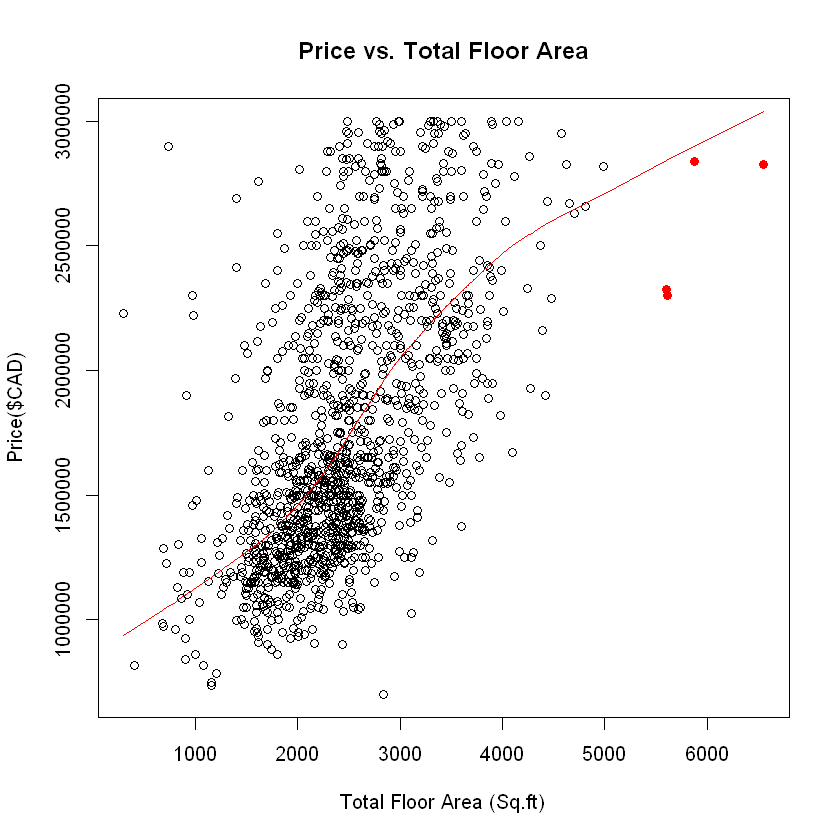

In [3]:
# code for making the plot:
# Create four scatterplots to show the association between the Price and each of the four explanatory variables
# Plot 1: Price and Areas
area.price = plot(Price ~ Total.floor.area, data = mydata, 
                  main = "Price vs. Total Floor Area", xlab = "Total Floor Area (Sq.ft)", ylab = "Price($CAD)") #Create a scatterplot of the association between Price and total floor areas
lines(lowess(mydata$Total.floor.area, mydata$Price, delta=0.1), col="red") #Create a lowess line
cor(mydata$Total.floor.area, mydata$Price) #Check the correlation between two variables
mydata[with (mydata, order(mydata$Total.floor.area)), ] #order the dataframe by total floor area 
points(5600,2325000, pch=16, col="red")
points(5615,2300000, pch=16, col="red")
points(5872,2840000, pch=16, col="red")
points(6556,2825000, pch=16, col="red")#plot the outliers in red

[1] 0.01198618

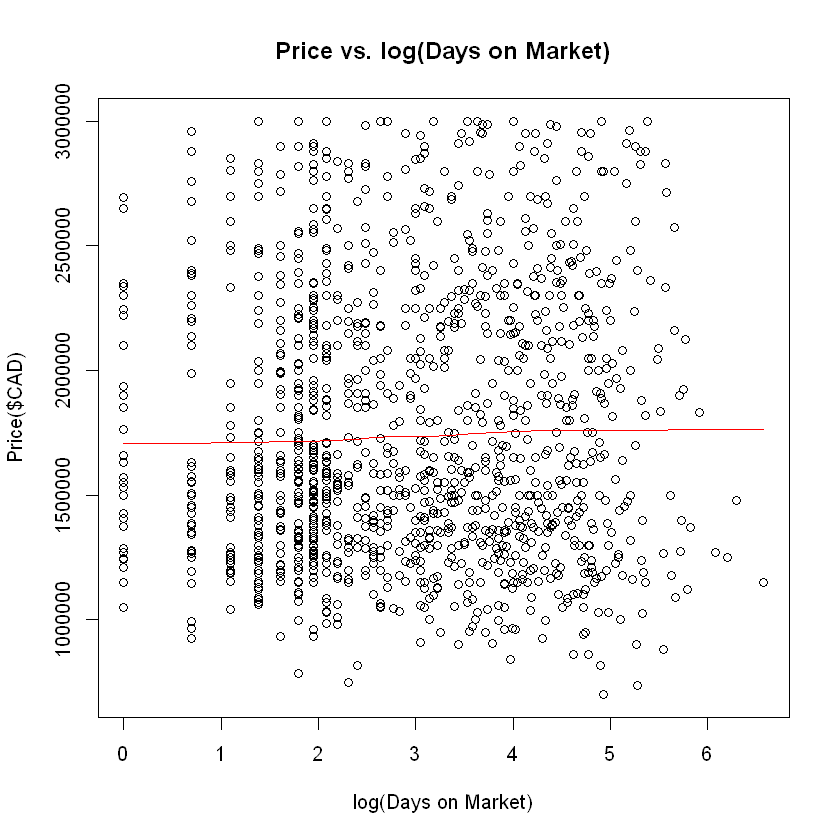

In [4]:
#Plot 2: Price and Days on market
days.price = plot(Price ~ log(Days.on.market), data = mydata,
                 main = "Price vs. log(Days on Market)", xlab = "log(Days on Market)", ylab = "Price($CAD)") #Create a scatterplot of the association between Price and Days on market. Transform Days on market using log so that we have better visual
lines(lowess(log(mydata$Days.on.market), mydata$Price, delta=0.1), col="red") #Creat a lowess line to see potential form
cor(mydata$Days.on.market, mydata$Price) #Check the correlation between two variables

[1] -0.2456666

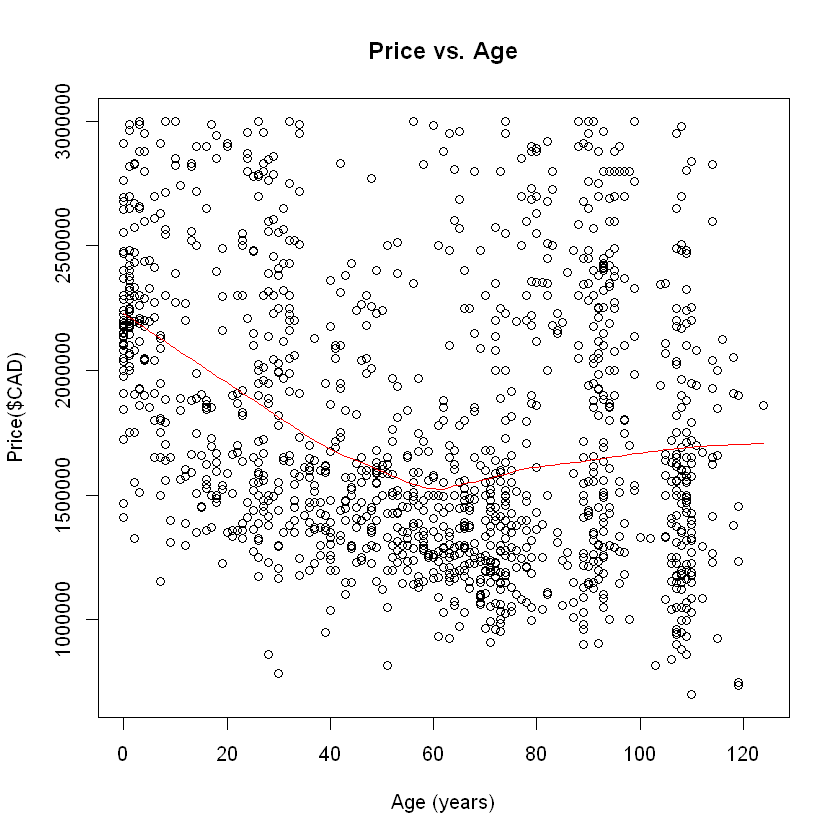

In [5]:
#Plot 3: Price and Age
age.price = plot(Price ~ Age, data = mydata,
                main = "Price vs. Age", xlab = "Age (years)", ylab = "Price($CAD)") #Create a scatterplot of the association between Price and Age.
lines(lowess(mydata$Age, mydata$Price, delta=0.1), col="red") #Creat a lowess line to see potential form
cor(mydata$Age, mydata$Price) #Check the correlation between two variables

[1] 0.4134886

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
844,844,3669 MAXWELL STREET,10/15/2019,1155000,5,1128,2012,7,1300.00
570,570,703 HEATLEY AVENUE,5/11/2020,750000,10,1153,1901,119,1525.00
924,924,703 HEATLEY AVENUE,7/25/2019,738000,196,1153,1901,119,1525.00
137,137,3451 QUEBEC STREET,9/30/2019,1415000,7,1584,1905,114,1600.00
1169,1169,2082 CHARLES STREET,9/24/2019,1327000,11,1263,2017,2,1696.00
1148,1148,450 SALSBURY DRIVE,8/27/2019,1310000,33,2364,2010,9,1762.00
758,758,4320 MILLER STREET,9/30/2019,785000,6,1201,1989,30,1764.00
787,787,3544 QUEBEC STREET,9/9/2019,1630000,7,1860,1913,106,1772.80
943,943,437 VERNON DRIVE,4/22/2020,1510000,18,1892,2017,3,1843.36


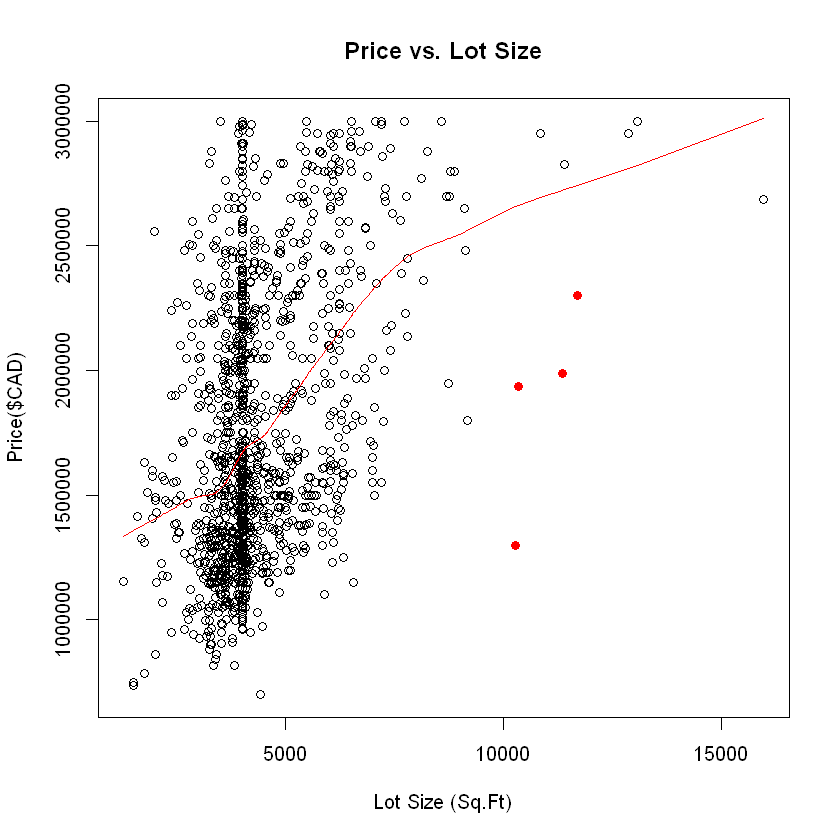

In [6]:
#Plot 4: Price and Lot size
lotsize.price = plot(Price ~ Lot.Size, data = mydata,
                    main = "Price vs. Lot Size", xlab = "Lot Size (Sq.Ft)", ylab = "Price($CAD)") #Create a scatterplot of the association between Price and Lot size. Using Log() to make the explanatary variable more spreadout
lines(lowess(mydata$Lot.Size, mydata$Price, delta=0.1), col="red") #Creat a lowess line to see potential form
cor(mydata$Lot.Size, mydata$Price) #Check the correlation between two variables
mydata[with (mydata, order(mydata$Lot.Size)), ] #order the dataframe by Lot Size 
points(10287,1300000, pch=16, col="red")
points(10348,1935000, pch=16, col="red")
points(11700,2300000, pch=16, col="red")
points(11351,1988000, pch=16, col="red")#plot the outliers in red

The analysis of the association between prices and the four explanatory variables involved assessing form, direction, strength, and outliers, as observed in the scatterplots:
1. Form:
A linear relationship exists between price and total floor areas, and between price and lot size. This matches our assumptions as the price of a house are directly related to its area and lot size. No linear relationship is found between price and each of the other two variables (Days on market and age).
2. Direction:
Both total floor areas and lot size have positive associations with price, which means that as either one of the two variables increases, the price increases. This matches our assumptions as prices normally go up with larger areas and lots. 
3. Strength:
The correlation coefficient between total floor areas and price is 0.585, which presents a moderate association. Normally the price of the house should be strongly correlated with its area. However, this is not the case here. It could result from the other variables not considered in this model, such as location, condition, and neighborhood. The correlation coefficient between lot size and price is 0.413, which presents a weak association. This is understandable as buyers normally do not weigh too much on the lot size.
4. Outliers:
Four outliers have been identified in area.price plot. They all have a lower price compared to their total floor areas. This may be due to the fact that they are at least 58 years old and their conditions are below average. The same reasoning may apply to the outliers of lotsize.area plot as they are at least 47 years old.

---
<div class="alert alert-block alert-warning">
<a id="Model_fit"></a>
    
# Model fit to training data, checking assumptions


Currently the equation for the model is:
Y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4
where Y is the price of house. 
Based on our exploratory data analysis, there are linear relationships between price and total floor areas, and between price and lot size. To test whether linear relationships exisit between price and days on market and between price and age, we will transform the days on market and age variables. Furthermore, the plot for price vs. lot size is still left-skewed, we will also do transformations on lot size and total floor area to see if there is clearer linear relationship. 

In [7]:
mydata.train

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,3178 GRAVELEY STREET,5/8/2020,1500000,18,2447,1946,74,5674.00
2,2,1438 E 28TH AVENUE,1/22/2020,1300000,7,2146,1982,38,3631.98
3,3,2831 W 49TH AVENUE,6/18/2019,2650000,1,3108,1929,90,9111.00
4,4,2645 TRIUMPH STREET,6/18/2019,1385000,28,2602,1922,97,4022.70
5,5,741-743 E 10TH AVENUE,11/28/2019,1590000,17,1843,1970,49,4026.00
6,6,86 W 21ST AVENUE,3/3/2020,2565000,7,2439,1989,31,4026.00
7,7,2418 E 54TH AVENUE,8/12/2019,1303000,9,2100,1979,40,3298.48
8,8,1787 E 57TH AVENUE,6/13/2019,1150000,10,1900,1950,69,6574.82
9,9,2926 TRIMBLE STREET,8/16/2019,2500000,10,2133,2005,14,3360.00


In [8]:
# Transformations on Days on Market:

mydata.train$Days.on.market.sq <- (mydata.train$Days.on.market)^2
mydata.train$Days.on.market.log <- log(mydata.train$Days.on.market)
mydata.train$Days.on.market.sqrt <- sqrt(mydata.train$Days.on.market)

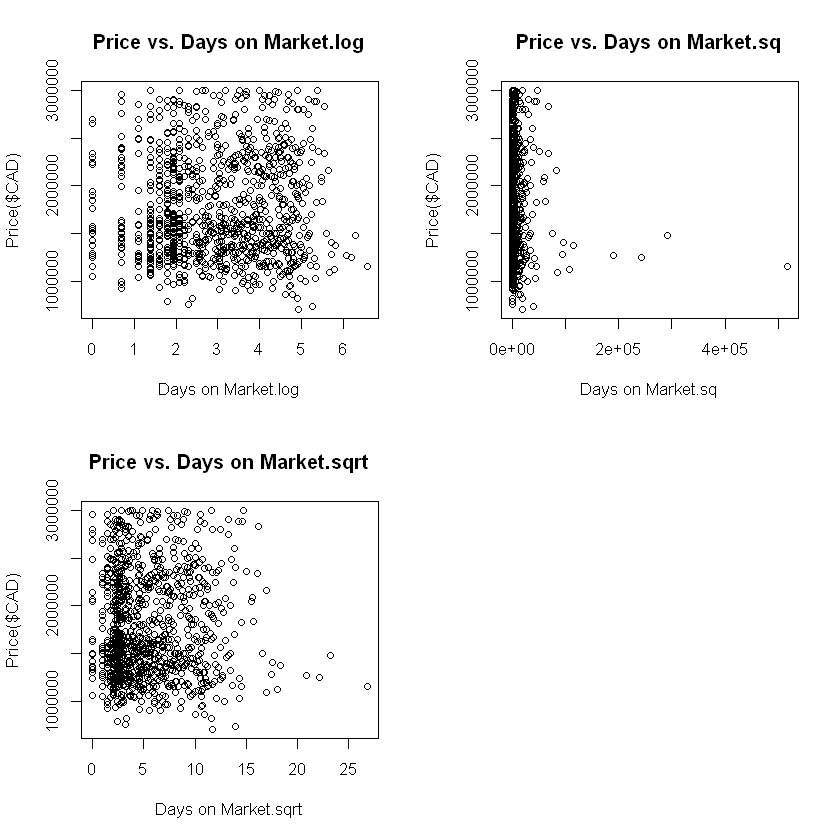

In [9]:
# Plot on the newly transformed variables
par(mfrow=c(2,2))
days.log.price = plot(Price ~ Days.on.market.log, data = mydata.train,
                 main = "Price vs. Days on Market.log", xlab = "Days on Market.log", ylab = "Price($CAD)") 
days.sq.price = plot(Price ~ Days.on.market.sq, data = mydata.train,
                 main = "Price vs. Days on Market.sq", xlab = "Days on Market.sq", ylab = "Price($CAD)") 
days.sqrt.price = plot(Price ~ Days.on.market.sqrt, data = mydata.train,
                 main = "Price vs. Days on Market.sqrt", xlab = "Days on Market.sqrt", ylab = "Price($CAD)") 

Based on the plots above, there is no linear relationship between price and days on market, no matter how we transform the days on market variable. Therefore, it is wise to exclude the variable in our final model.

In [10]:
# Transformations on Age:

mydata.train$age.sq <- (mydata.train$Age)^2
mydata.train$age.log <- log(mydata.train$Age)
mydata.train$age.sqrt <- sqrt(mydata.train$Age)

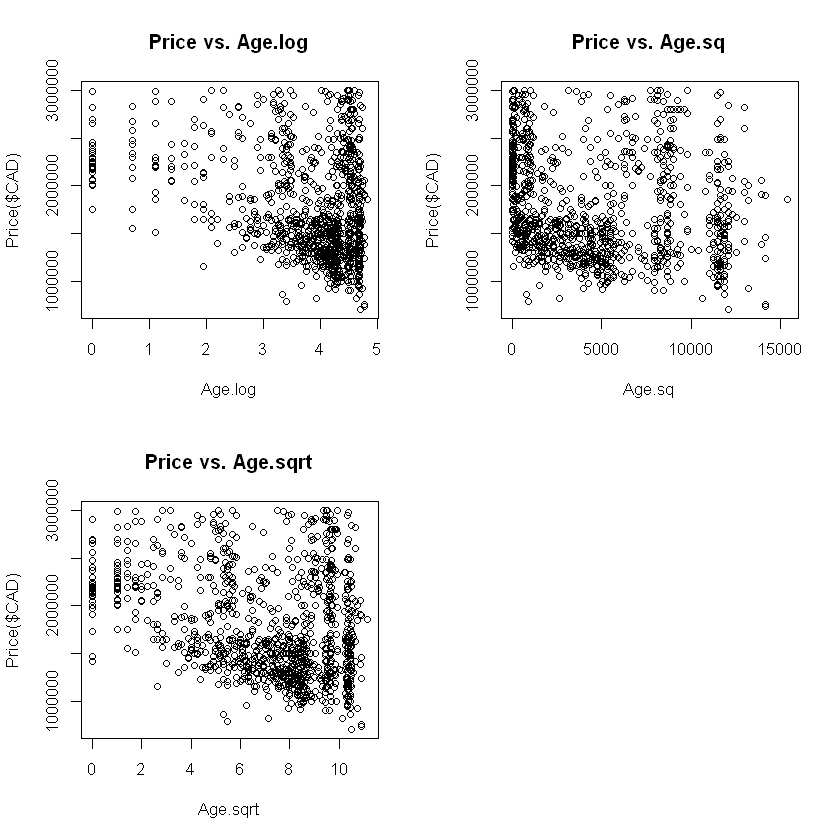

In [11]:
# Plot on the newly transformed variables
par(mfrow=c(2,2))
age.log.price = plot(Price ~ age.log, data = mydata.train,
                 main = "Price vs. Age.log", xlab = "Age.log", ylab = "Price($CAD)") 
age.sq.price = plot(Price ~ age.sq, data = mydata.train,
                 main = "Price vs. Age.sq", xlab = "Age.sq", ylab = "Price($CAD)") 
age.sqrt.price = plot(Price ~ age.sqrt, data = mydata.train,
                 main = "Price vs. Age.sqrt", xlab = "Age.sqrt", ylab = "Price($CAD)") 

Based on the plots above, there is no linear relationship between price and age, no matter how we transform the days on market variable. Therefore, it is wise to exclude the variable in our final model. 

In [12]:
# Transformations on lot size:

mydata.train$lot.sq <- (mydata.train$Lot.Size)^2
mydata.train$lot.log <- log(mydata.train$Lot.Size)
mydata.train$lot.sqrt <- sqrt(mydata.train$Lot.Size)

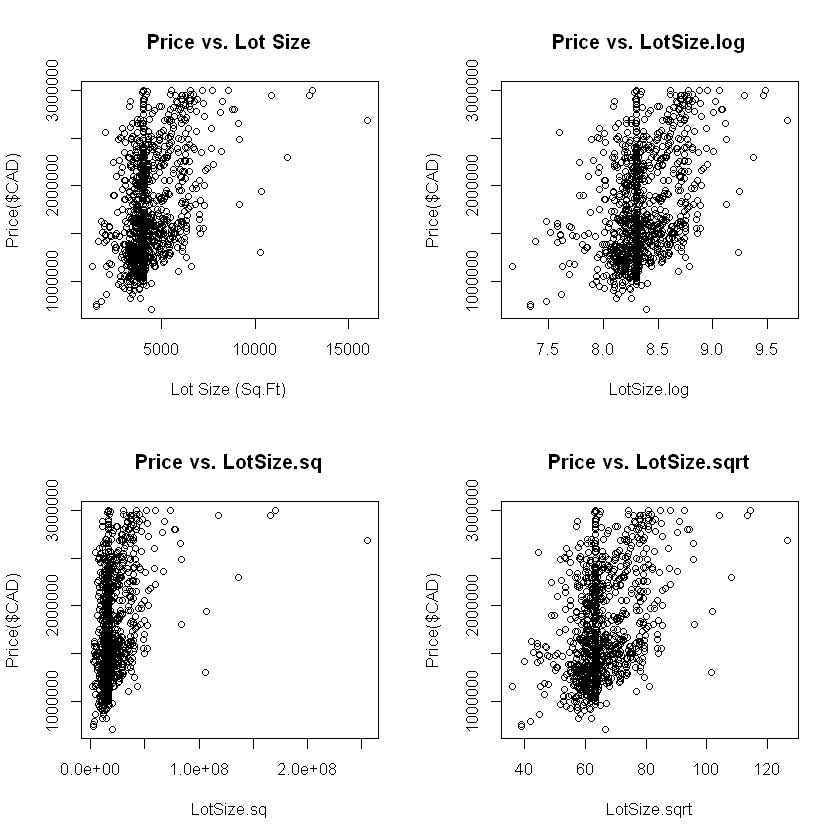

In [13]:
# Plot on the newly transformed variables
par(mfrow=c(2,2))
lotsize.price = plot(Price ~ Lot.Size, data = mydata.train,
                    main = "Price vs. Lot Size", xlab = "Lot Size (Sq.Ft)", ylab = "Price($CAD)")
lot.log.price = plot(Price ~ lot.log, data = mydata.train,
                 main = "Price vs. LotSize.log", xlab = "LotSize.log", ylab = "Price($CAD)") 
lot.sq.price = plot(Price ~ lot.sq, data = mydata.train,
                 main = "Price vs. LotSize.sq", xlab = "LotSize.sq", ylab = "Price($CAD)") 
lot.sqrt.price = plot(Price ~ lot.sqrt, data = mydata.train,
                 main = "Price vs. LotSize.sqrt", xlab = "LotSize.sqrt", ylab = "Price($CAD)") 

The plot for LotSize.log looks better than the original variable and we will compare them later to determine which one fits better for the final model.

In [14]:
# Transformations on total floor area:

mydata.train$floor.sq <- (mydata.train$Total.floor.area)^2
mydata.train$floor.log <- log(mydata.train$Total.floor.area)
mydata.train$floor.sqrt <- sqrt(mydata.train$Total.floor.area)

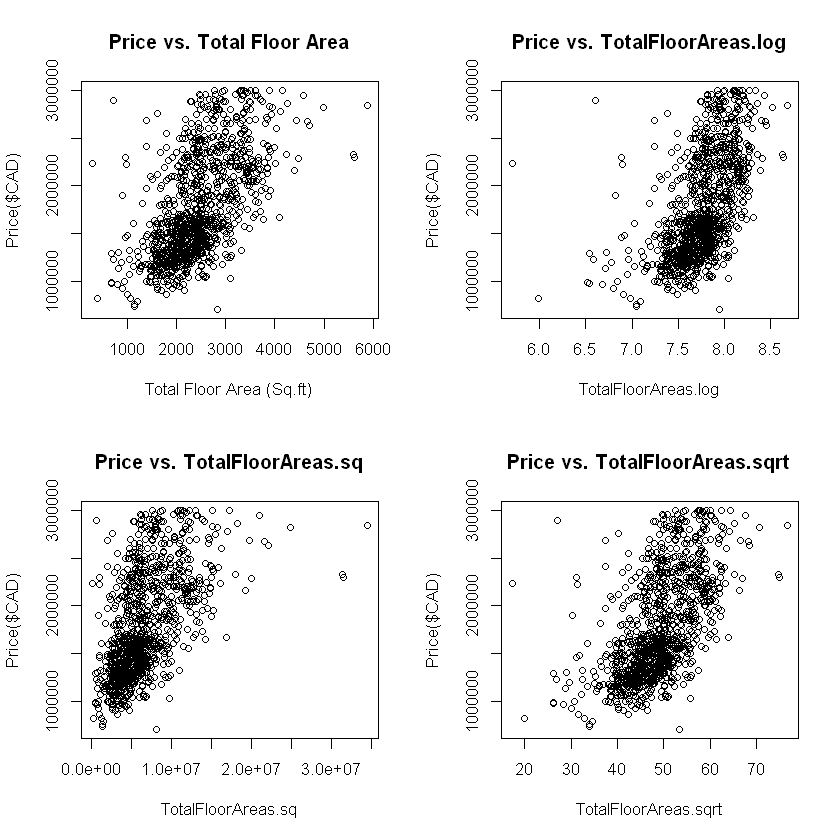

In [15]:
# Plot on the newly transformed variables
par(mfrow=c(2,2))
area.price = plot(Price ~ Total.floor.area, data = mydata.train, 
                  main = "Price vs. Total Floor Area", xlab = "Total Floor Area (Sq.ft)", ylab = "Price($CAD)")
area.log.price = plot(Price ~ floor.log, data = mydata.train,
                 main = "Price vs. TotalFloorAreas.log", xlab = "TotalFloorAreas.log", ylab = "Price($CAD)") 
area.sq.price = plot(Price ~ floor.sq, data = mydata.train,
                 main = "Price vs. TotalFloorAreas.sq", xlab = "TotalFloorAreas.sq", ylab = "Price($CAD)") 
area.sqrt.price = plot(Price ~ floor.sqrt, data = mydata.train,
                 main = "Price vs. TotalFloorAreas.sqrt", xlab = "TotalFloorAreas.sqrt", ylab = "Price($CAD)") 

The plot for Total Floor Areas square root looks better than the original variable and we will compare them later to determine which one fits better for the final model.

### Fit your final model

In [16]:
# Fit our final model here, use summary to get model co-efficients and other useful output:
str(mydata.train)

'data.frame':	1042 obs. of  21 variables:
 $ Number             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Address            : chr  "3178 GRAVELEY STREET" "1438 E 28TH AVENUE" "2831 W 49TH AVENUE" "2645 TRIUMPH STREET" ...
 $ List.Date          : chr  "5/8/2020" "1/22/2020" "6/18/2019" "6/18/2019" ...
 $ Price              : int  1500000 1300000 2650000 1385000 1590000 2565000 1303000 1150000 2500000 2400000 ...
 $ Days.on.market     : int  18 7 1 28 17 7 9 10 10 44 ...
 $ Total.floor.area   : int  2447 2146 3108 2602 1843 2439 2100 1900 2133 3989 ...
 $ Year.Built         : int  1946 1982 1929 1922 1970 1989 1979 1950 2005 2019 ...
 $ Age                : int  74 38 90 97 49 31 40 69 14 0 ...
 $ Lot.Size           : num  5674 3632 9111 4023 4026 ...
 $ Days.on.market.sq  : num  324 49 1 784 289 ...
 $ Days.on.market.log : num  2.89 1.95 0 3.33 2.83 ...
 $ Days.on.market.sqrt: num  4.24 2.65 1 5.29 4.12 ...
 $ age.sq             : num  5476 1444 8100 9409 2401 ...
 $ age.log            : num 

In [17]:
#testing our models using different forms of total floor area and lot size:
z1 <- lm(Price ~ floor.sqrt + lot.log + floor.sqrt * lot.log, data=mydata.train)
summary(z1)
z2 <- lm(Price ~ floor.sqrt + lot.sqrt + floor.sqrt * lot.sqrt, data=mydata.train)
summary(z2)
z3 <- lm(Price ~ floor.sqrt + Lot.Size + floor.sqrt * Lot.Size, data=mydata.train)
summary(z3)
z4 <- lm(Price ~ floor.log + lot.log + floor.log * lot.log, data = mydata.train)
summary(z4)
z5 <- lm(Price ~ floor.log + lot.sqrt + floor.log * lot.sqrt, data=mydata.train)
summary(z5)
z6 <- lm(Price ~ floor.log + Lot.Size + floor.log * Lot.Size, data=mydata.train)
summary(z6)
z7 <- lm(Price ~ floor.sq + lot.log + floor.sq * lot.log, data=mydata.train)
summary(z7)
z8 <- lm(Price ~ floor.sq + lot.sqrt + floor.sq * lot.sqrt, data=mydata.train)
summary(z8)
z9 <- lm(Price ~ floor.sq + Lot.Size + floor.sq * Lot.Size, data=mydata.train)
summary(z9)
z10 <- lm(Price ~ Total.floor.area + lot.log + Total.floor.area * lot.log, data=mydata.train)
summary(z10)
z11 <- lm(Price ~ Total.floor.area + lot.sqrt + Total.floor.area * lot.sqrt, data=mydata.train)
summary(z11)
z12 <- lm(Price ~ Total.floor.area + Lot.Size + Total.floor.area * Lot.Size, data=mydata.train)
summary(z12)


Call:
lm(formula = Price ~ floor.sqrt + lot.log + floor.sqrt * lot.log, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1248219  -322120   -83387   285607  1778619 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)        -2858775    2483267  -1.151    0.250
floor.sqrt            25485      49789   0.512    0.609
lot.log              336799     297348   1.133    0.258
floor.sqrt:lot.log     1391       5931   0.234    0.815

Residual standard error: 430500 on 1038 degrees of freedom
Multiple R-squared:  0.3627,	Adjusted R-squared:  0.3608 
F-statistic: 196.9 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sqrt + lot.sqrt + floor.sqrt * lot.sqrt, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1245268  -319250   -80517   283244  1694542 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1331434.2   602127.8  -2.211 0.027238 *  
floor.sqrt             46249.3    11868.8   3.897 0.000104 ***
lot.sqrt               19708.1     9138.5   2.157 0.031267 *  
floor.sqrt:lot.sqrt     -140.6      176.3  -0.797 0.425516    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 429100 on 1038 degrees of freedom
Multiple R-squared:  0.3667,	Adjusted R-squared:  0.3649 
F-statistic: 200.4 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sqrt + Lot.Size + floor.sqrt * Lot.Size, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1242877  -316281   -77066   280219  1642392 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -9.601e+05  2.995e+05  -3.205  0.00139 ** 
floor.sqrt           4.730e+04  5.860e+03   8.072  1.9e-15 ***
Lot.Size             2.095e+02  6.664e+01   3.144  0.00171 ** 
floor.sqrt:Lot.Size -2.307e+00  1.248e+00  -1.849  0.06478 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 428100 on 1038 degrees of freedom
Multiple R-squared:  0.3696,	Adjusted R-squared:  0.3678 
F-statistic: 202.9 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.log + lot.log + floor.log * lot.log, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1241015  -343011   -75316   289752  2107460 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)        3274912    9324189   0.351    0.725
floor.log          -684696    1199384  -0.571    0.568
lot.log            -925294    1116607  -0.829    0.407
floor.log:lot.log   177952     143448   1.241    0.215

Residual standard error: 437700 on 1038 degrees of freedom
Multiple R-squared:  0.3411,	Adjusted R-squared:  0.3392 
F-statistic: 179.1 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.log + lot.sqrt + floor.log * lot.sqrt, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1236056  -339216   -72465   288144  2100043 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        -4920470.2  2271204.6  -2.166   0.0305 *
floor.log            743548.8   290662.9   2.558   0.0107 *
lot.sqrt               7533.6    34516.6   0.218   0.8273  
floor.log:lot.sqrt      838.6     4394.6   0.191   0.8487  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 436500 on 1038 degrees of freedom
Multiple R-squared:  0.3447,	Adjusted R-squared:  0.3428 
F-statistic:   182 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.log + Lot.Size + floor.log * Lot.Size, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1232476  -337645   -72617   292715  2114437 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.871e+06  1.134e+06  -5.176 2.72e-07 ***
floor.log           9.271e+05  1.448e+05   6.404 2.29e-10 ***
Lot.Size            3.261e+02  2.537e+02   1.285    0.199    
floor.log:Lot.Size -2.873e+01  3.204e+01  -0.896    0.370    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 435900 on 1038 degrees of freedom
Multiple R-squared:  0.3464,	Adjusted R-squared:  0.3446 
F-statistic: 183.4 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sq + lot.log + floor.sq * lot.log, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1224298  -325587   -92191   281111  1284877 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.384e+06  7.382e+05  -5.939 3.90e-09 ***
floor.sq          4.455e-01  9.207e-02   4.839 1.50e-06 ***
lot.log           6.803e+05  8.855e+04   7.682 3.61e-14 ***
floor.sq:lot.log -4.423e-02  1.081e-02  -4.092 4.61e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 429500 on 1038 degrees of freedom
Multiple R-squared:  0.3654,	Adjusted R-squared:  0.3636 
F-statistic: 199.2 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sq + lot.sqrt + floor.sq * lot.sqrt, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1221425  -322105   -93960   277148  1293767 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.841e+05  1.751e+05  -1.051    0.293    
floor.sq           1.707e-01  2.093e-02   8.155 1.00e-15 ***
lot.sqrt           2.262e+04  2.673e+03   8.465  < 2e-16 ***
floor.sq:lot.sqrt -1.445e-03  2.914e-04  -4.959 8.28e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 427300 on 1038 degrees of freedom
Multiple R-squared:  0.3722,	Adjusted R-squared:  0.3703 
F-statistic: 205.1 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sq + Lot.Size + floor.sq * Lot.Size, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1215738  -317053   -88104   270629  1295735 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.445e+05  8.553e+04   6.367 2.90e-10 ***
floor.sq           1.232e-01  1.018e-02  12.100  < 2e-16 ***
Lot.Size           1.727e+02  1.913e+01   9.024  < 2e-16 ***
floor.sq:Lot.Size -1.080e-05  1.882e-06  -5.740 1.24e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 425600 on 1038 degrees of freedom
Multiple R-squared:  0.377,	Adjusted R-squared:  0.3752 
F-statistic: 209.3 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ Total.floor.area + lot.log + Total.floor.area * 
    lot.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1245685  -318964   -83994   288076  1585613 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -3.717e+06  1.306e+06  -2.845 0.004522 ** 
Total.floor.area          9.402e+02  5.008e+02   1.878 0.060721 .  
lot.log                   5.422e+05  1.565e+05   3.464 0.000555 ***
Total.floor.area:lot.log -6.538e+01  5.938e+01  -1.101 0.271147    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 427500 on 1038 degrees of freedom
Multiple R-squared:  0.3716,	Adjusted R-squared:  0.3698 
F-statistic: 204.6 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ Total.floor.area + lot.sqrt + Total.floor.area * 
    lot.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1243905  -312773   -83577   278740  1513745 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -5.766e+05  3.150e+05  -1.831   0.0675 .  
Total.floor.area           6.290e+02  1.173e+02   5.361 1.02e-07 ***
lot.sqrt                   2.123e+04  4.794e+03   4.427 1.06e-05 ***
Total.floor.area:lot.sqrt -3.584e+00  1.709e+00  -2.097   0.0362 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 425800 on 1038 degrees of freedom
Multiple R-squared:  0.3765,	Adjusted R-squared:  0.3747 
F-statistic: 208.9 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ Total.floor.area + Lot.Size + Total.floor.area * 
    Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1241506  -309967   -82244   273093  1459010 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                9.182e+03  1.558e+05   0.059  0.95303    
Total.floor.area           5.539e+02  5.747e+01   9.637  < 2e-16 ***
Lot.Size                   1.839e+02  3.480e+01   5.286 1.53e-07 ***
Total.floor.area:Lot.Size -3.611e-02  1.173e-02  -3.079  0.00213 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 424400 on 1038 degrees of freedom
Multiple R-squared:  0.3804,	Adjusted R-squared:  0.3786 
F-statistic: 212.4 on 3 and 1038 DF,  p-value: < 2.2e-16


In [18]:
# Drop the interactions to see if there are any other better models
z1_1 <- lm(Price ~ floor.sqrt + lot.log, data=mydata.train)
summary(z1_1)
z2_1 <- lm(Price ~ floor.sqrt + lot.sqrt, data=mydata.train)
summary(z2_1)
z3_1 <- lm(Price ~ floor.sqrt + Lot.Size, data=mydata.train)
summary(z3_1)
z4_1 <- lm(Price ~ floor.log + lot.log, data = mydata.train)
summary(z4_1)
z5_1 <- lm(Price ~ floor.log + lot.sqrt, data=mydata.train)
summary(z5_1)
z6_1 <- lm(Price ~ floor.log + Lot.Size, data=mydata.train)
summary(z6_1)
z7_1 <- lm(Price ~ floor.sq + lot.log, data=mydata.train)
summary(z7_1)
z8_1 <- lm(Price ~ floor.sq + lot.sqrt, data=mydata.train)
summary(z8_1)
z9_1 <- lm(Price ~ floor.sq + Lot.Size, data=mydata.train)
summary(z9_1)
z10_1 <- lm(Price ~ Total.floor.area + lot.log, data=mydata.train)
summary(z10_1)
z11_1 <- lm(Price ~ Total.floor.area + lot.sqrt, data=mydata.train)
summary(z11_1)
z12_1 <- lm(Price ~ Total.floor.area + Lot.Size, data=mydata.train)
summary(z12_1)


Call:
lm(formula = Price ~ floor.sqrt + lot.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1249279  -323357   -83077   284247  1765443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3432132     431660  -7.951 4.80e-15 ***
floor.sqrt     37149       2058  18.051  < 2e-16 ***
lot.log       405287      55542   7.297 5.84e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 430300 on 1039 degrees of freedom
Multiple R-squared:  0.3626,	Adjusted R-squared:  0.3614 
F-statistic: 295.6 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sqrt + lot.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1241433  -317896   -82036   279336  1746565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -859974     113168  -7.599 6.64e-14 ***
floor.sqrt     36929       2045  18.056  < 2e-16 ***
lot.sqrt       12539       1624   7.721 2.70e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 429000 on 1039 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.3651 
F-statistic: 300.3 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sqrt + Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1234283  -318773   -78173   275416  1753137 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -433613.71   92874.11  -4.669 3.43e-06 ***
floor.sqrt    37133.16    2027.43  18.315  < 2e-16 ***
Lot.Size         88.07      11.21   7.856 9.83e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 428600 on 1039 degrees of freedom
Multiple R-squared:  0.3675,	Adjusted R-squared:  0.3663 
F-statistic: 301.9 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.log + lot.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1245389  -345409   -74142   291685  2098264 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8277380     469483 -17.631  < 2e-16 ***
floor.log     801988      47986  16.713  < 2e-16 ***
lot.log       458161      55821   8.208 6.63e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 437800 on 1039 degrees of freedom
Multiple R-squared:  0.3401,	Adjusted R-squared:  0.3389 
F-statistic: 267.8 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.log + lot.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1236808  -339490   -73490   287621  2098726 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5348884     343719 -15.562   <2e-16 ***
floor.log     798265      47638  16.757   <2e-16 ***
lot.sqrt       14113       1630   8.657   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 436300 on 1039 degrees of freedom
Multiple R-squared:  0.3446,	Adjusted R-squared:  0.3434 
F-statistic: 273.2 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.log + Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1228938  -334268   -75591   288814  2119382 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.905e+06  3.520e+05 -13.936   <2e-16 ***
floor.log    8.044e+05  4.723e+04  17.031   <2e-16 ***
Lot.Size     9.889e+01  1.126e+01   8.785   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 435900 on 1039 degrees of freedom
Multiple R-squared:  0.3459,	Adjusted R-squared:  0.3447 
F-statistic: 274.8 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sq + lot.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1608465  -322403   -94916   275124  1366245 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.007e+06  4.590e+05  -4.374 1.34e-05 ***
floor.sq     6.913e-02  3.926e-03  17.608  < 2e-16 ***
lot.log      3.989e+05  5.621e+04   7.096 2.37e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 432800 on 1039 degrees of freedom
Multiple R-squared:  0.3552,	Adjusted R-squared:  0.3539 
F-statistic: 286.1 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sq + lot.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1707959  -320970   -89890   269866  1352942 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.299e+05  1.008e+05   5.255 1.79e-07 ***
floor.sq    6.869e-02  3.922e-03  17.515  < 2e-16 ***
lot.sqrt    1.213e+04  1.652e+03   7.345 4.16e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 432100 on 1039 degrees of freedom
Multiple R-squared:  0.3573,	Adjusted R-squared:  0.356 
F-statistic: 288.8 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ floor.sq + Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1814689  -321942   -97021   270292  1359925 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.553e+05  4.756e+04  20.089  < 2e-16 ***
floor.sq    6.906e-02  3.902e-03  17.700  < 2e-16 ***
Lot.Size    8.393e+01  1.144e+01   7.334  4.5e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 432100 on 1039 degrees of freedom
Multiple R-squared:  0.3572,	Adjusted R-squared:  0.356 
F-statistic: 288.7 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ Total.floor.area + lot.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1239730  -322071   -85477   288322  1630922 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2364224.7   444131.7  -5.323 1.25e-07 ***
Total.floor.area      389.3       21.0  18.537  < 2e-16 ***
lot.log            381058.4    55543.5   6.861 1.18e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 427500 on 1039 degrees of freedom
Multiple R-squared:  0.3708,	Adjusted R-squared:  0.3696 
F-statistic: 306.2 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ Total.floor.area + lot.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1232267  -317214   -84978   275604  1613835 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      51552.43   97546.93   0.528    0.597    
Total.floor.area   386.90      20.91  18.505  < 2e-16 ***
lot.sqrt         11766.31    1626.62   7.234 9.12e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 426500 on 1039 degrees of freedom
Multiple R-squared:  0.3739,	Adjusted R-squared:  0.3727 
F-statistic: 310.2 on 2 and 1039 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price ~ Total.floor.area + Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1304776  -313441   -83906   263042  1619307 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      457385.32   55917.30   8.180 8.25e-16 ***
Total.floor.area    388.71      20.74  18.742  < 2e-16 ***
Lot.Size             82.46      11.24   7.339 4.33e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 426200 on 1039 degrees of freedom
Multiple R-squared:  0.3747,	Adjusted R-squared:  0.3735 
F-statistic: 311.4 on 2 and 1039 DF,  p-value: < 2.2e-16


Compared with other models, the overall performance of z9 model is relatively better. All variables in this model are significantly based on the P-values, the R-squared of this model is 0.377, which is relatively higher, and the residual standard error is 425600, which is slightly lower. Also, this model has a slightly higher F-statistic. The result of the F test is statistically significant so the null hypothesis can be rejected.

Since models z10_1, z11_1, z12_1, z8, z11 and z12 are also good models, they are chosen to be the candidate models. Comparisons of candidate models and the final model will be performed in the end. 

In [19]:
summary(z9)


Call:
lm(formula = Price ~ floor.sq + Lot.Size + floor.sq * Lot.Size, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1215738  -317053   -88104   270629  1295735 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.445e+05  8.553e+04   6.367 2.90e-10 ***
floor.sq           1.232e-01  1.018e-02  12.100  < 2e-16 ***
Lot.Size           1.727e+02  1.913e+01   9.024  < 2e-16 ***
floor.sq:Lot.Size -1.080e-05  1.882e-06  -5.740 1.24e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 425600 on 1038 degrees of freedom
Multiple R-squared:  0.377,	Adjusted R-squared:  0.3752 
F-statistic: 209.3 on 3 and 1038 DF,  p-value: < 2.2e-16


In [20]:
drop1(z9, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,1.880314e+14,27015.32,NA,NA
floor.sq:Lot.Size,1,5.968459e+12,1.939999e+14,27045.88,32.94801,1.241811e-08


**Write the equation of the model, replacing the co-efficients with the numbers from the output of the summary command:**

predicted value for house sale price = 544500 + 0.1232 * floor.sq + 172.7 * Lot.Size - 0.0000108 floor.sq * Lot.Size

*floor.sq = Squared value of total floor area

**Interpret the value of each co-efficient assuming that the x-variables are independent of each other and describe the type of interaction (reinforcement, interference):**    

Interpretation of the Co-efficients: For one unit increase in squared value of total floor area, the predicted value for the house sale price increases by 0.1232. For every square foot increase in lot size of houses in Vancouver, the predicted value for house sale price increases by 172.7. Based on the partial F test, the interaction is significant (F-value = 32.95, P-value is very low). The type of interaction is interference.

---
## Check the assumptions 
Create plots / conduct tests and write a sentence to interpret each result.

In [21]:
# Check assumptions of linearity, equal variance, normality here.
# Comment on any unusual observations (outliers) that are observed.
checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) {
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
  lines(resid.values)
  
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}


	Shapiro-Wilk normality test

data:  resid.values
W = 0.95766, p-value < 2.2e-16


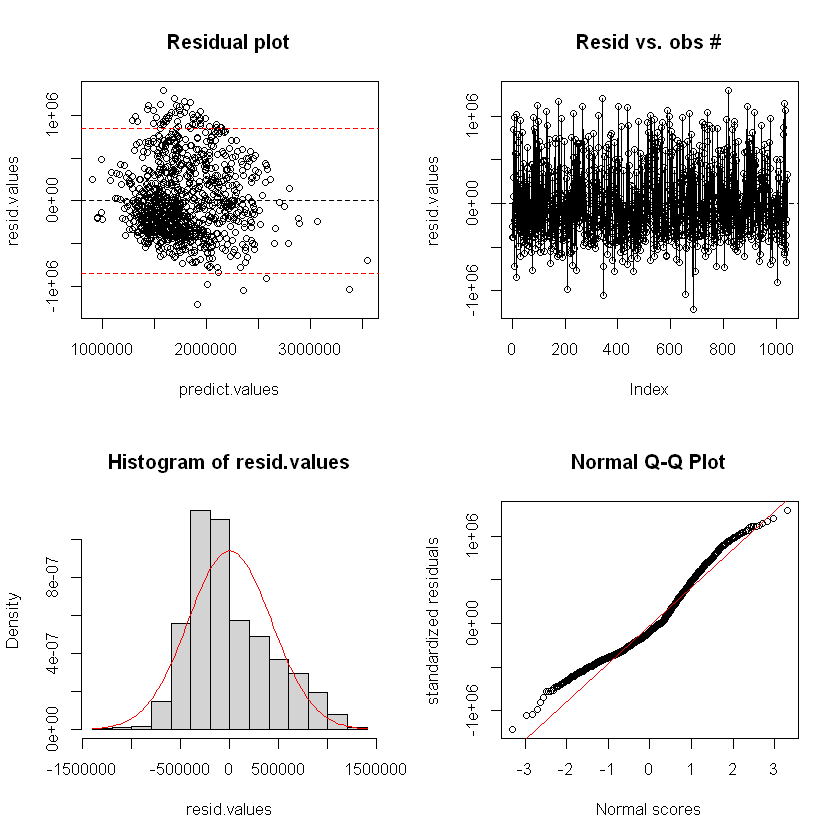

In [22]:
checkresiduals(z9)

1. Assumption #1 - Linearity 
Based on the Residual Plot, the model lacks linearity, which means that the regression line does not fit the data well.
Estimates of co-efficients and their standard errors might be biased.
2. Assumption #2 - Equal Variance
Based on the Residual Plot, the band of points on the residual plot has a semi-constant range from left to right. Therefore, this model has a rather Equal variance – Assumption #2 is met here.
3. Assumption #3 - Normality
According to the Histogram of residual values and Normal Q-Q Plot, the errors are nearly normally distributed. 

Based on the assumption checkings above, the conclusion is drawn that this model is not perfect for meeting the assumptions. However, other candidate models are also checked for assumptions and this model performs the best among all the models. 

 
**Describe how the assumption of independence could be violated for this dataset in relation to space.**  

The house value varies dramatically depending on the location. According to Chan (2022), the median real estate price in different areas of Vancouver has a huge difference, ranging from 2.32 million CAD in West Vancouver to $ 653,000 CAD in New Westminster. Houses close to good schools, hospitals, supermarkets, shopping malls and parks are more expensive than houses in remote areas even though they have the same floor areas and lot sizes. Therefore, the price of the house does not only depend on the total floor areas or lot size, and the assumption of independence could be violated.

Chan, K. (2022, August 11). *Metro Vancouver home prices down by up to 25% compared to early 2022*. Retrieved October 13, 2022, from https://dailyhive.com/vancouver/metro-vancouver-home-prices-july-2022 

---
## Goodness of fit to the training set


In [23]:
summary(z9)


Call:
lm(formula = Price ~ floor.sq + Lot.Size + floor.sq * Lot.Size, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1215738  -317053   -88104   270629  1295735 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.445e+05  8.553e+04   6.367 2.90e-10 ***
floor.sq           1.232e-01  1.018e-02  12.100  < 2e-16 ***
Lot.Size           1.727e+02  1.913e+01   9.024  < 2e-16 ***
floor.sq:Lot.Size -1.080e-05  1.882e-06  -5.740 1.24e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 425600 on 1038 degrees of freedom
Multiple R-squared:  0.377,	Adjusted R-squared:  0.3752 
F-statistic: 209.3 on 3 and 1038 DF,  p-value: < 2.2e-16


Residual standard error is used to measure the error of the regression line's predictability. Thus, the smaller the residual standard error is, the smaller the difference between the observed values and the predicted values will be, in other words, the more predictive and useful the model is.

R-squared explains how much a dependent variable is explained by the independent variables in a regression model. Although the R-squared of 37.7% means that only 37.7% of movements of the price can be explained by movements in the total floor area and the lot size of houses the model, this is the most reasonable model found by comparison.

---
## Any concerns about the explanatory variables being related to each other

Show plots and/or do analyses to support your conclusions. If there are associations between explanatory variables, what effect could this have on your model? How would this affect your predictions?  

In [24]:
summary(z9)


Call:
lm(formula = Price ~ floor.sq + Lot.Size + floor.sq * Lot.Size, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1215738  -317053   -88104   270629  1295735 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.445e+05  8.553e+04   6.367 2.90e-10 ***
floor.sq           1.232e-01  1.018e-02  12.100  < 2e-16 ***
Lot.Size           1.727e+02  1.913e+01   9.024  < 2e-16 ***
floor.sq:Lot.Size -1.080e-05  1.882e-06  -5.740 1.24e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 425600 on 1038 degrees of freedom
Multiple R-squared:  0.377,	Adjusted R-squared:  0.3752 
F-statistic: 209.3 on 3 and 1038 DF,  p-value: < 2.2e-16


In [25]:
str(mydata.train)

'data.frame':	1042 obs. of  21 variables:
 $ Number             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Address            : chr  "3178 GRAVELEY STREET" "1438 E 28TH AVENUE" "2831 W 49TH AVENUE" "2645 TRIUMPH STREET" ...
 $ List.Date          : chr  "5/8/2020" "1/22/2020" "6/18/2019" "6/18/2019" ...
 $ Price              : int  1500000 1300000 2650000 1385000 1590000 2565000 1303000 1150000 2500000 2400000 ...
 $ Days.on.market     : int  18 7 1 28 17 7 9 10 10 44 ...
 $ Total.floor.area   : int  2447 2146 3108 2602 1843 2439 2100 1900 2133 3989 ...
 $ Year.Built         : int  1946 1982 1929 1922 1970 1989 1979 1950 2005 2019 ...
 $ Age                : int  74 38 90 97 49 31 40 69 14 0 ...
 $ Lot.Size           : num  5674 3632 9111 4023 4026 ...
 $ Days.on.market.sq  : num  324 49 1 784 289 ...
 $ Days.on.market.log : num  2.89 1.95 0 3.33 2.83 ...
 $ Days.on.market.sqrt: num  4.24 2.65 1 5.29 4.12 ...
 $ age.sq             : num  5476 1444 8100 9409 2401 ...
 $ age.log            : num 

In [26]:
mydata.train.2 = subset(mydata.train, select = c('floor.sq', 'Lot.Size'))

In [27]:
z9.vif = lm(Price ~ floor.sq + Lot.Size, data = mydata.train)

Loading required package: carData



floor.sq Lot.Size 
1.213139 1.213139

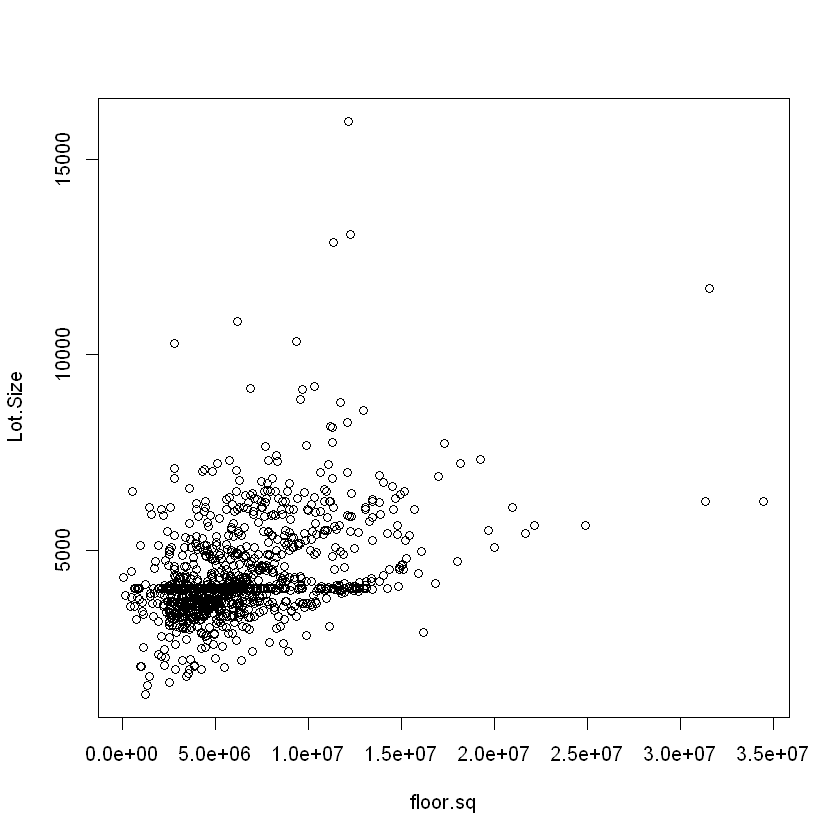

In [28]:
library(car) 

plot(mydata.train.2)
vif(z9.vif)

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity. The VIF above shows that the explanatory variables contain a very weak relationship with each other.

---
<div class="alert alert-block alert-warning">
<a id="Hyp_tests"></a>

# Hypothesis tests

Conduct F-tests for regression significance and t-tests for variable significance. In case of an interaction, only test the interaction (no need to test main effects). Conclude each hypothesis test, including the test statistic and p-value (α = 0.05). Evaluate the variable contributions to the final model based on these results.

In [29]:
drop1(z9, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,1.880314e+14,27015.32,NA,NA
floor.sq:Lot.Size,1,5.968459e+12,1.939999e+14,27045.88,32.94801,1.241811e-08


In [30]:
summary(z9)


Call:
lm(formula = Price ~ floor.sq + Lot.Size + floor.sq * Lot.Size, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1215738  -317053   -88104   270629  1295735 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.445e+05  8.553e+04   6.367 2.90e-10 ***
floor.sq           1.232e-01  1.018e-02  12.100  < 2e-16 ***
Lot.Size           1.727e+02  1.913e+01   9.024  < 2e-16 ***
floor.sq:Lot.Size -1.080e-05  1.882e-06  -5.740 1.24e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 425600 on 1038 degrees of freedom
Multiple R-squared:  0.377,	Adjusted R-squared:  0.3752 
F-statistic: 209.3 on 3 and 1038 DF,  p-value: < 2.2e-16


The variable floor.sq is significant in the final model (t statistic = 12.1, df error = 1038, p-value < 0.0001).
The variable Lot Size is significant in the final model (t statistic = 9.024, df error = 1038, p-value < 0.0001).
The variable floor.sq:Lot.Size is significant in the final model (t statistic = -5.74, df error = 1038, p-value < 0.0001)

The results show that the variable floor.sq has a stronger effect on the price of houses in Vancouver than the variables Lot Size and floor.sq:Lot.Size, since the t statistic of floor.sq is bigger.

---
<div class="alert alert-block alert-warning">
<a id="Prediction"></a>

# Using the model for prediction

Generate predicted values using the validation set data with the final model fitted to the training set. Ensure the model remains consistent with the training data and use the validation set data solely as new x-values. Calculate the mean absolute error (MAE) and root mean squared error (root MSE) for the validation set. If the y-variable was transformed, revert the predicted values to the original units before computing these metrics.

In [31]:
# Include your code here
mydata.valid$predict.z9 <- predict(z9, newdata=mydata.valid)
RMSE.z9 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z9)^2/nrow(mydata.valid)); RMSE.z9
MAE.z9 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z9))/nrow(mydata.valid); MAE.z9

ERROR: Error in eval(predvars, data, env): object 'floor.sq' not found


---
<div class="alert alert-block alert-warning">
<a id="Compare"></a>

# Comparing to other candidate models

Compare MAE and root MSE for the validation set between the final model and other candidate models.（The predicted values are reverted to their original units if the y-variable was transformed before calculating these metrics.）

The result table:

| Model | MAE | root MSE | model statement|
|------|------|------|------|
| Final model | 369383.956 | 90945.091 | Price ~ floor.sq + Lot.Size + floor.sq * Lot.Size |
| Model z8 | 371758.608 | 102298.014 | Price ~ floor.sq + lot.sqrt + floor.sq * lot.sqrt |
| Model z10 | 373342.005 | 230700.6872 | Price ~ Total.floor.area + lot.log + Total.floor.area * lot.log |
| Model z11 | 370069.521 | 220271.938 | Price ~ Total.floor.area + lot.sqrt + Total.floor.area * lot.sqrt |
| Model z12 | 366356.084 | 203838.231 | Total.floor.area + Lot.Size + Total.floor.area * Lot.Size |
| Model z10_1 | 373887.980 | 266578.015 | Price ~ Total.floor.area + lot.log |
| Model z11_1 | 371976.425 | 291146.284 | Price ~ Total.floor.area + lot.sqrt |
| Model z12_1 | 370457.840 | 306948.433 | Price ~ Total.floor.area + Lot.Size |


Based on the comparison with other candidate models, the final model has the lowest root MSE, and second lowest MAE, which indicates that the final model has the best performance in terms of minimizing errors. 

---
<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion

The final model addresses the goal of the analysis best among all the models after multiple comparisons. The final model only includes two variables, floor.sq and Lot.Size, because the scatterplots show that there is no linear relationship between price and age and price and days on market, no matter how we transform these two variables. Then, the F test is used to compare t stat, f stat, R squared, and every p-value of every model. The values of our final model are statistically significant, which means floor.sq, Lot. Size and their interaction have a strong impact on the price. The partial f test is also used to double confirm the impact of the interaction of the floor.sq and Lot.Size. After that, the vif analysis test shows that floor.sq and Lot.Size have no relationship so the capability of the final model to predict the price is pretty strong. Finally, we found that the RMSE of the final model is minimal and the MAE is also relatively small compared to other candidate models, which means the prediction will be pretty accurate.

Based on the available data, the final model's prediction results are very reliable, which is its advantage. We can predict the sale price for a specific house and the general trend of market price changes, help house sellers find approximate the ideal sale price, and let house buyers optimize their purchase decision-making. From this data, a benchmark of home value trends can be computed.

However, we have to admit that this model has limitations. The data we collected didn't include several factors that influence the house price such as physical facts about the home and land, tax assessment information, and geographic location. Since it is easy to collect the data of tax information and it is reasonable to subdivide the houses in Vancouver into micro-regions based on their geographical location, we can add these two variables to improve our final model. Technically, The lower tax rate increases the affordability and the purchasing power of a buyer. Also, if the house is in a good location, with good non-residential amenities such as shopping centers and schools around it, its price will be driven up.


Reference: 
Zillow Research. (n.d.). Zillow Home Value Index Methodology. Retrieved October 13, 2022, from https://www.zillow.com/research/zhvi-methodology/ 

---
<div class="alert alert-block alert-warning">
<a id="Transformations"></a>
    
# Visualizing appropriate transformations

In [32]:
# Include the code for visualizing appropriate transformations of the variables here

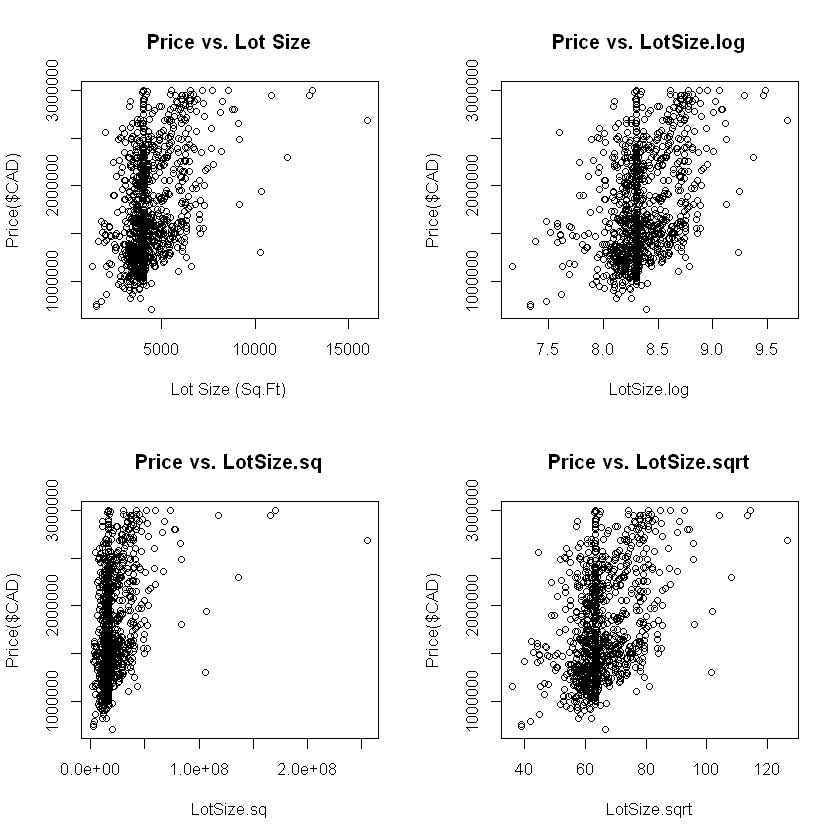

In [33]:
# Plot on the newly transformed variables
par(mfrow=c(2,2))
lotsize.price = plot(Price ~ Lot.Size, data = mydata.train,
                    main = "Price vs. Lot Size", xlab = "Lot Size (Sq.Ft)", ylab = "Price($CAD)")
lot.log.price = plot(Price ~ lot.log, data = mydata.train,
                 main = "Price vs. LotSize.log", xlab = "LotSize.log", ylab = "Price($CAD)") 
lot.sq.price = plot(Price ~ lot.sq, data = mydata.train,
                 main = "Price vs. LotSize.sq", xlab = "LotSize.sq", ylab = "Price($CAD)") 
lot.sqrt.price = plot(Price ~ lot.sqrt, data = mydata.train,
                 main = "Price vs. LotSize.sqrt", xlab = "LotSize.sqrt", ylab = "Price($CAD)") 

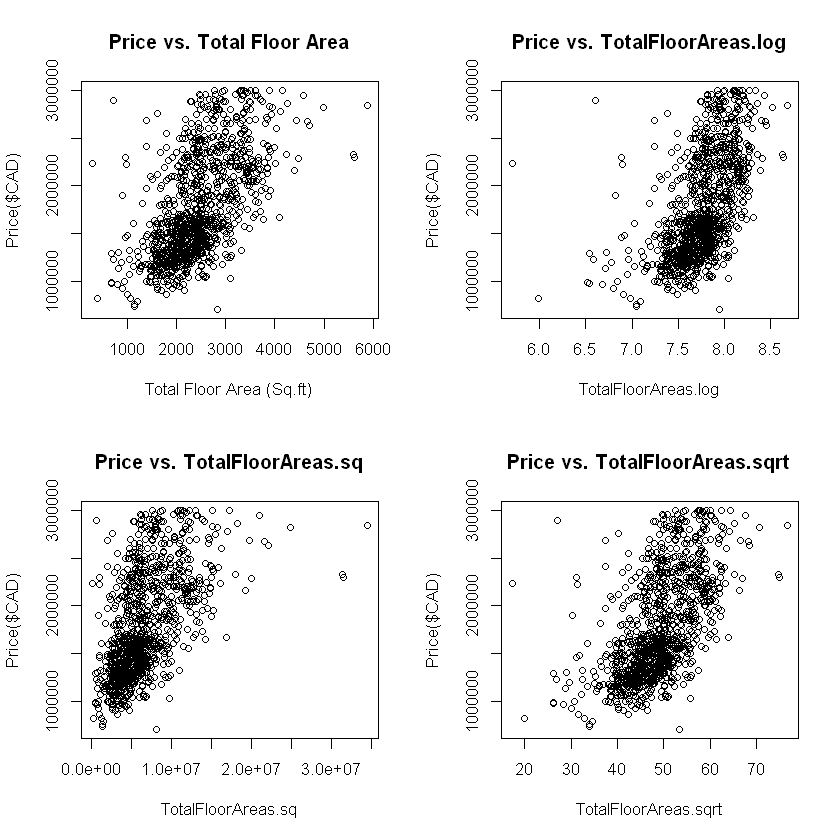

In [34]:
# Plot on the newly transformed variables
par(mfrow=c(2,2))
area.price = plot(Price ~ Total.floor.area, data = mydata.train, 
                  main = "Price vs. Total Floor Area", xlab = "Total Floor Area (Sq.ft)", ylab = "Price($CAD)")
area.log.price = plot(Price ~ floor.log, data = mydata.train,
                 main = "Price vs. TotalFloorAreas.log", xlab = "TotalFloorAreas.log", ylab = "Price($CAD)") 
area.sq.price = plot(Price ~ floor.sq, data = mydata.train,
                 main = "Price vs. TotalFloorAreas.sq", xlab = "TotalFloorAreas.sq", ylab = "Price($CAD)") 
area.sqrt.price = plot(Price ~ floor.sqrt, data = mydata.train,
                 main = "Price vs. TotalFloorAreas.sqrt", xlab = "TotalFloorAreas.sqrt", ylab = "Price($CAD)") 

---
<div class="alert alert-block alert-warning">
<a id="Other_models"></a>
    
# Other candidate models

While we were testing for the best models, there were some models that also showed significance in the F-tests. We picked z10_1, z11_1, z12_1, z8, z11 and z12 models based on their performances in the following categories:
1. Multiple R-sqaured and adjusted R-squared; 2. P-value of each variable; 3. F-statistics; 4. P-value of the whole model; 5. Residual Standard Errors.

We did not choose these candidate models becasue flaws exist on some of the criterion above. But they are still capable of predicting housing price in Vancouver.

In [35]:
#Transformation on the variables total floor area and lot size in validation dataset
mydata.valid$lot.sq <- (mydata.valid$Lot.Size)^2
mydata.valid$lot.log <- log(mydata.valid$Lot.Size)
mydata.valid$lot.sqrt <- sqrt(mydata.valid$Lot.Size)

mydata.valid$floor.sq <- (mydata.valid$Total.floor.area)^2
mydata.valid$floor.log <- log(mydata.valid$Total.floor.area)
mydata.valid$floor.sqrt <- sqrt(mydata.valid$Total.floor.area)

In [36]:
# Include the code for your other candidate models here.
z8 <- lm(Price ~ floor.sq + lot.sqrt + floor.sq * lot.sqrt, data=mydata.train)
summary(z8)
mydata.valid$predict.z8 <- predict(z8, newdata=mydata.valid)
RMSE.z8 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z8)^2/nrow(mydata.valid)); RMSE.z8
MAE.z8 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z8))/nrow(mydata.valid); MAE.z8


Call:
lm(formula = Price ~ floor.sq + lot.sqrt + floor.sq * lot.sqrt, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1221425  -322105   -93960   277148  1293767 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.841e+05  1.751e+05  -1.051    0.293    
floor.sq           1.707e-01  2.093e-02   8.155 1.00e-15 ***
lot.sqrt           2.262e+04  2.673e+03   8.465  < 2e-16 ***
floor.sq:lot.sqrt -1.445e-03  2.914e-04  -4.959 8.28e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 427300 on 1038 degrees of freedom
Multiple R-squared:  0.3722,	Adjusted R-squared:  0.3703 
F-statistic: 205.1 on 3 and 1038 DF,  p-value: < 2.2e-16


[1] 102298

[1] 371758.6

In [37]:
z10 <- lm(Price ~ Total.floor.area + lot.log + Total.floor.area * lot.log, data=mydata.train)
summary(z10)
mydata.valid$predict.z10 <- predict(z10, newdata=mydata.valid)
RMSE.z10 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z10)^2/nrow(mydata.valid)); RMSE.z10
MAE.z10 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z10))/nrow(mydata.valid); MAE.z10


Call:
lm(formula = Price ~ Total.floor.area + lot.log + Total.floor.area * 
    lot.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1245685  -318964   -83994   288076  1585613 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -3.717e+06  1.306e+06  -2.845 0.004522 ** 
Total.floor.area          9.402e+02  5.008e+02   1.878 0.060721 .  
lot.log                   5.422e+05  1.565e+05   3.464 0.000555 ***
Total.floor.area:lot.log -6.538e+01  5.938e+01  -1.101 0.271147    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 427500 on 1038 degrees of freedom
Multiple R-squared:  0.3716,	Adjusted R-squared:  0.3698 
F-statistic: 204.6 on 3 and 1038 DF,  p-value: < 2.2e-16


[1] 230700.7

[1] 373342

In [38]:
z11 <- lm(Price ~ Total.floor.area + lot.sqrt + Total.floor.area * lot.sqrt, data=mydata.train)
summary(z11)
mydata.valid$predict.z11 <- predict(z11, newdata=mydata.valid)
RMSE.z11 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z11)^2/nrow(mydata.valid)); RMSE.z11
MAE.z11 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z11))/nrow(mydata.valid); MAE.z11


Call:
lm(formula = Price ~ Total.floor.area + lot.sqrt + Total.floor.area * 
    lot.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1243905  -312773   -83577   278740  1513745 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -5.766e+05  3.150e+05  -1.831   0.0675 .  
Total.floor.area           6.290e+02  1.173e+02   5.361 1.02e-07 ***
lot.sqrt                   2.123e+04  4.794e+03   4.427 1.06e-05 ***
Total.floor.area:lot.sqrt -3.584e+00  1.709e+00  -2.097   0.0362 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 425800 on 1038 degrees of freedom
Multiple R-squared:  0.3765,	Adjusted R-squared:  0.3747 
F-statistic: 208.9 on 3 and 1038 DF,  p-value: < 2.2e-16


[1] 220271.9

[1] 370069.5

In [39]:
z12 <- lm(Price ~ Total.floor.area + Lot.Size + Total.floor.area * Lot.Size, data=mydata.train)
summary(z12)
mydata.valid$predict.z12 <- predict(z12, newdata=mydata.valid)
RMSE.z12 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z12)^2/nrow(mydata.valid)); RMSE.z12
MAE.z12 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z12))/nrow(mydata.valid); MAE.z12


Call:
lm(formula = Price ~ Total.floor.area + Lot.Size + Total.floor.area * 
    Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1241506  -309967   -82244   273093  1459010 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                9.182e+03  1.558e+05   0.059  0.95303    
Total.floor.area           5.539e+02  5.747e+01   9.637  < 2e-16 ***
Lot.Size                   1.839e+02  3.480e+01   5.286 1.53e-07 ***
Total.floor.area:Lot.Size -3.611e-02  1.173e-02  -3.079  0.00213 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 424400 on 1038 degrees of freedom
Multiple R-squared:  0.3804,	Adjusted R-squared:  0.3786 
F-statistic: 212.4 on 3 and 1038 DF,  p-value: < 2.2e-16


[1] 203838.2

[1] 366356.1

In [40]:
z10_1 <- lm(Price ~ Total.floor.area + lot.log, data=mydata.train)
summary(z10_1)
mydata.valid$predict.z10_1 <- predict(z10_1, newdata=mydata.valid)
RMSE.z10_1 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z10_1)^2/nrow(mydata.valid)); RMSE.z10_1
MAE.z10_1 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z10_1))/nrow(mydata.valid); MAE.z10_1


Call:
lm(formula = Price ~ Total.floor.area + lot.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1239730  -322071   -85477   288322  1630922 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2364224.7   444131.7  -5.323 1.25e-07 ***
Total.floor.area      389.3       21.0  18.537  < 2e-16 ***
lot.log            381058.4    55543.5   6.861 1.18e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 427500 on 1039 degrees of freedom
Multiple R-squared:  0.3708,	Adjusted R-squared:  0.3696 
F-statistic: 306.2 on 2 and 1039 DF,  p-value: < 2.2e-16


[1] 266578

[1] 373888

In [41]:
z11_1 <- lm(Price ~ Total.floor.area + lot.sqrt, data=mydata.train)
summary(z11_1)
mydata.valid$predict.z11_1 <- predict(z11_1, newdata=mydata.valid)
RMSE.z11_1 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z11_1)^2/nrow(mydata.valid)); RMSE.z11_1
MAE.z11_1 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z11_1))/nrow(mydata.valid); MAE.z11_1


Call:
lm(formula = Price ~ Total.floor.area + lot.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1232267  -317214   -84978   275604  1613835 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      51552.43   97546.93   0.528    0.597    
Total.floor.area   386.90      20.91  18.505  < 2e-16 ***
lot.sqrt         11766.31    1626.62   7.234 9.12e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 426500 on 1039 degrees of freedom
Multiple R-squared:  0.3739,	Adjusted R-squared:  0.3727 
F-statistic: 310.2 on 2 and 1039 DF,  p-value: < 2.2e-16


[1] 291146.3

[1] 371976.4

In [42]:
z12_1 <- lm(Price ~ Total.floor.area + Lot.Size, data=mydata.train)
summary(z12_1)
mydata.valid$predict.z12_1 <- predict(z12_1, newdata=mydata.valid)
RMSE.z12_1 <- sqrt(sum(mydata.valid$Price - mydata.valid$predict.z12_1)^2/nrow(mydata.valid)); RMSE.z12_1
MAE.z12_1 <- sum(abs(mydata.valid$Price - mydata.valid$predict.z12_1))/nrow(mydata.valid); MAE.z12_1


Call:
lm(formula = Price ~ Total.floor.area + Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1304776  -313441   -83906   263042  1619307 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      457385.32   55917.30   8.180 8.25e-16 ***
Total.floor.area    388.71      20.74  18.742  < 2e-16 ***
Lot.Size             82.46      11.24   7.339 4.33e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 426200 on 1039 degrees of freedom
Multiple R-squared:  0.3747,	Adjusted R-squared:  0.3735 
F-statistic: 311.4 on 2 and 1039 DF,  p-value: < 2.2e-16


[1] 306948.4

[1] 370457.8